In [1]:
# !python -m pip install numpy scipy matplotlib emcee pytransit ldtk corner arviz celerite
# !python -m pip install aesthetic
# !python -m pip install ipywidgets

In [1]:
import sys
sys.path.insert(0, '/ut3/muscat/reduction_afphot/notebooks/TFOP/')
from tfop_analysis import Star, Planet, LPF

/ut3/muscat/reduction_afphot/notebooks/TFOP/tfop_analysis.py:19: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
star = Star('TOI-5671')
star_params = star.params_to_dict()
star_params

Querying TFOP data for TOI-5671
Mstar=(0.40,0.02) Msun
Rstar=(0.41,0.01) Rsun
Rhostar=(5.89,0.62) rhosun
teff=(3380,157) K
logg=(4.82,0.00) cgs
feh=(0.00,0.00) dex


{'rstar': (0.408427, 0.0125522),
 'mstar': (0.408427, 0.0125522),
 'rhostar': (5.885181788660491, 0.620913145319562),
 'teff': (3380.0, 157.0),
 'logg': (4.81894, 0.00440884),
 'feh': (0.0, 0.00440884)}

In [3]:
planet = Planet('TOI-5671', star_params=star_params)
planet_params = planet.params_to_dict()
planet_params

Querying TFOP data for TOI-5671
t0=(2459685.753346, 0.0018235) BJD
P=(3.3079817, 0.0006559) d
Rp/Rs=[0.28492104 0.01190273]


{'t0': (2459685.753346, 0.0018235),
 'period': (3.3079817, 0.0006559),
 'tdur': array([0.13783257, 0.00758333]),
 'rprs': array([0.28492104, 0.01190273]),
 'a_Rs': (16.86725928839332, 0.5931905699076486)}

In [4]:
#init
lpf = LPF(name='TOI-5671',
          ticid=star.ticid,
          inst='MuSCAT3',
          date='220630',
          phot_dir='/ut3/jerome/github/research/project/toi5671/tfop',
          bands=['g','r','i','z'],
          model='chromatic',
          star_params=star_params, 
          planet_params=planet_params, 
          time_offset=2459761,
         )

Input t0: (2459685.753346, 0.0018235)
Shifted t0: (2459761.8369251, 0.01519550909775648)
Shifted by 23 periods.
39720.56024820478 True [0.00114672 0.00088526 0.00083054 0.00098305]


In [5]:
lpf.model_params

{'tc': (0.8369250998667184, 0.01519550909775648),
 'imp': (0, 0.1),
 'a_Rs': (16.86725928839332, 0.5931905699076486),
 'k_g': array([0.28492104, 0.01190273]),
 'k_r': array([0.28492104, 0.01190273]),
 'k_i': array([0.28492104, 0.01190273]),
 'k_z': array([0.28492104, 0.01190273]),
 'd_g': (0, 0),
 'd_r': (0, 0),
 'd_i': (0, 0),
 'd_z': (0, 0)}

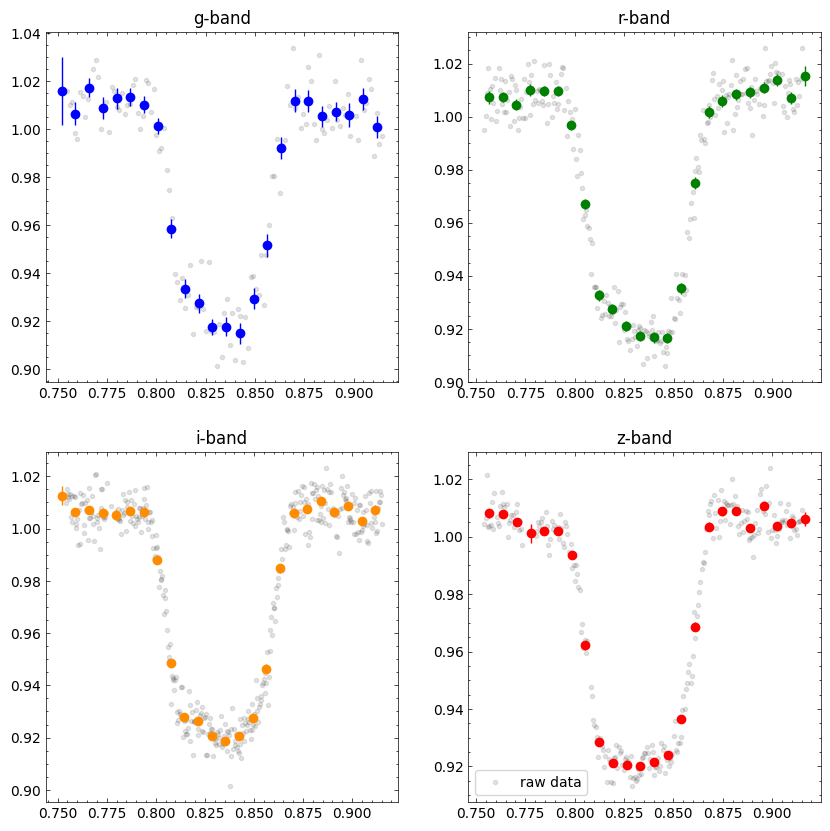

In [8]:
fig = lpf.plot_raw_data()

In [ ]:
lpf.optimize_chi2_linear_baseline()

In [6]:
p0 = [v[0] for k,v in lpf.model_params.items()]
p0

[0.8369250998667184,
 0,
 16.86725928839332,
 0.2849210416940104,
 0.2849210416940104,
 0.2849210416940104,
 0.2849210416940104,
 0,
 0,
 0,
 0]

In [7]:
lpf.get_chi2_chromatic_transit(p0)

4461.985117631593

In [8]:
while True:
    lpf.optimize_chromatic_transit(p0)
    if lpf.opt_result.success:
        break

Optimization successful!
---------------------
Optimized parameters:
tc: 0.83
imp: 0.00
a_Rs: 17.78
k_g: 0.27
k_r: 0.27
k_i: 0.27
k_z: 0.27
d_g: -0.00
d_r: -0.04
d_i: 0.01
d_z: 0.03


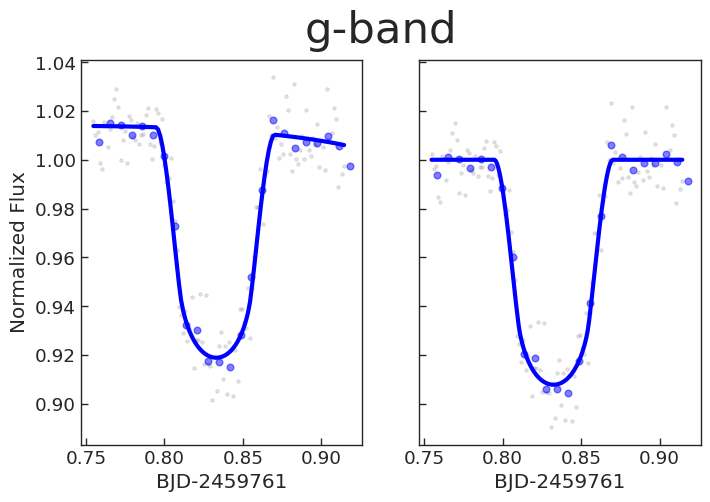

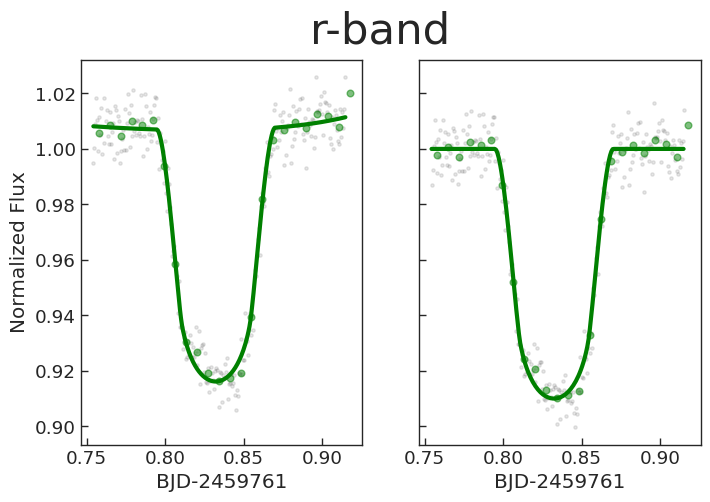

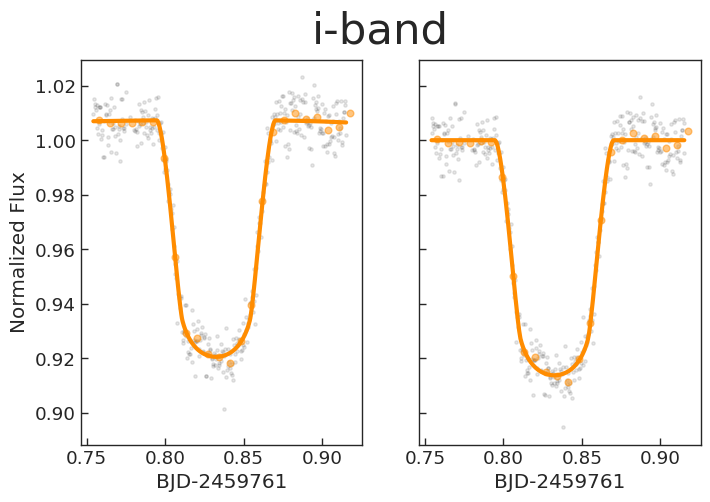

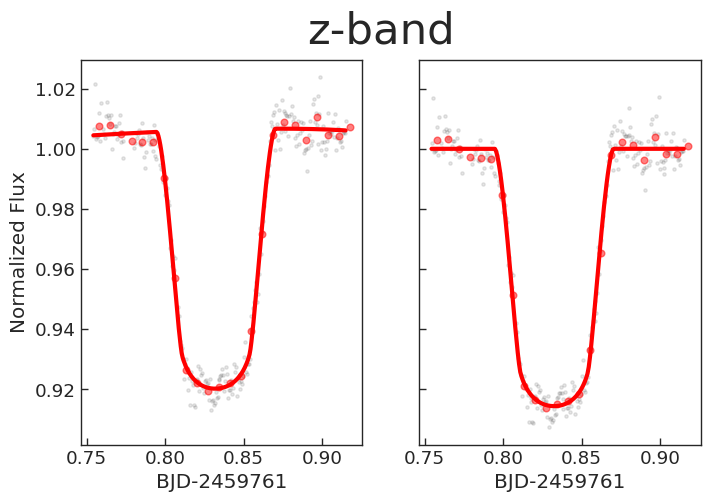

In [9]:
fig = lpf.plot_optimum_lightcurves()

In [10]:
lpf.sample_mcmc(nsteps=10_000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:02<00:00, 54.69it/s]


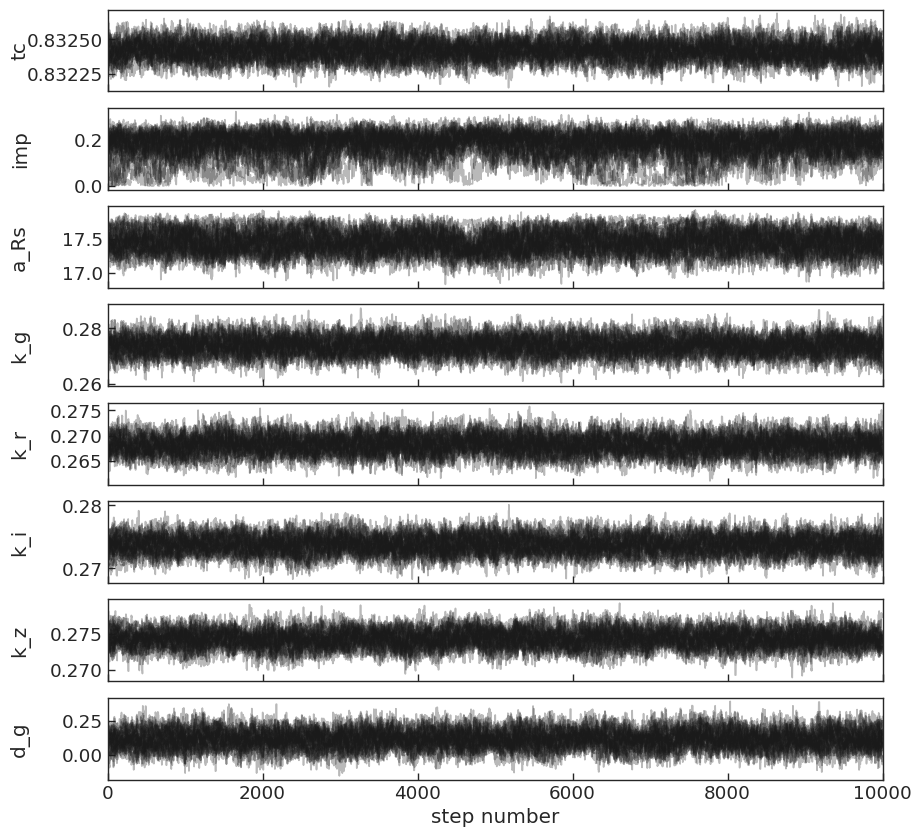

In [11]:
fig = lpf.plot_chain(start=0, end=8)

In [12]:
df = lpf.get_mcmc_samples(discard=100, thin=10)
df.head()

,tc,imp,a_Rs,k_g,k_r,k_i,k_z,d_g,d_r,d_i,d_z
0,2.459762e+06,0.191407,17.488021,0.271787,0.268332,0.275190,0.274632,0.068799,-0.037616,0.045607,0.003136
1,2.459762e+06,0.207259,17.288805,0.271534,0.270470,0.275536,0.275031,0.066608,-0.059181,0.075179,0.027732
2,2.459762e+06,0.169893,17.583826,0.266935,0.266617,0.271612,0.274565,0.024665,-0.061513,0.012760,0.014403
3,2.459762e+06,0.153000,17.581876,0.270023,0.265179,0.271063,0.272555,0.117793,-0.117971,0.019907,0.005130
4,2.459762e+06,0.168613,17.503700,0.274158,0.271994,0.272993,0.274756,0.097814,0.014160,0.057659,0.025549


In [13]:
 df.shape

(32670, 11)

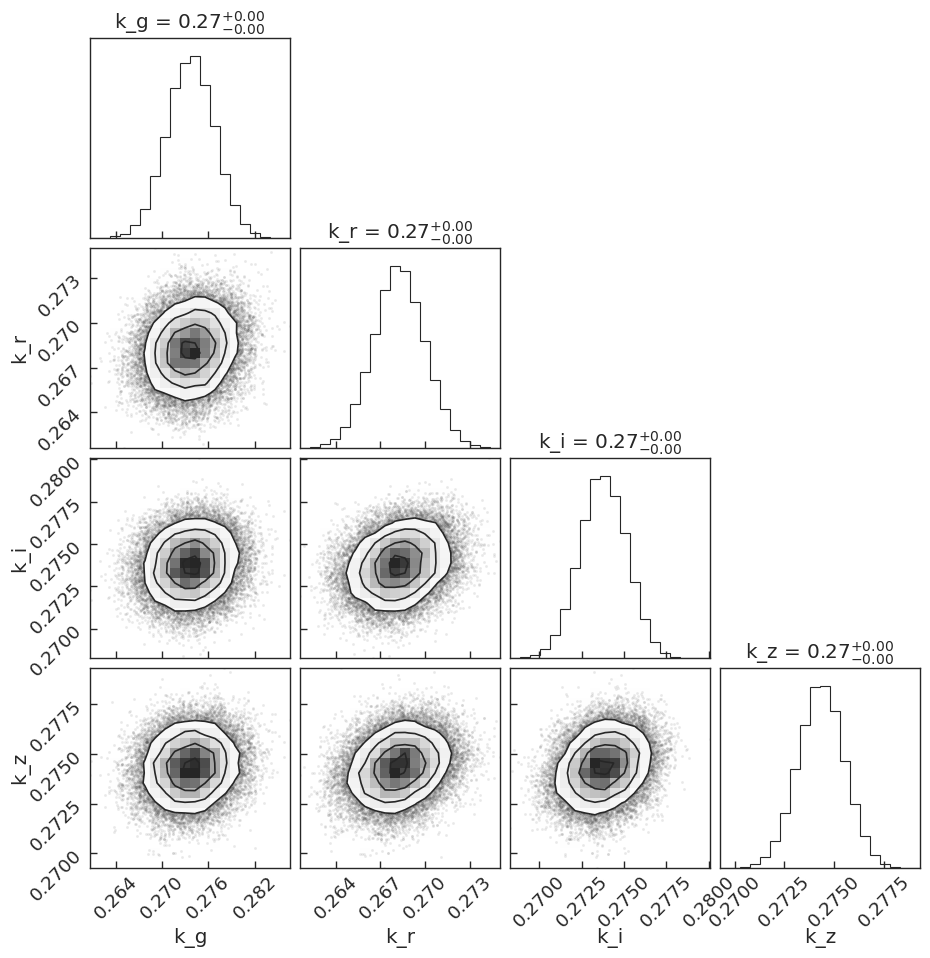

In [16]:
fig = lpf.plot_corner(discard=100, thin=10, start=3, end=7)

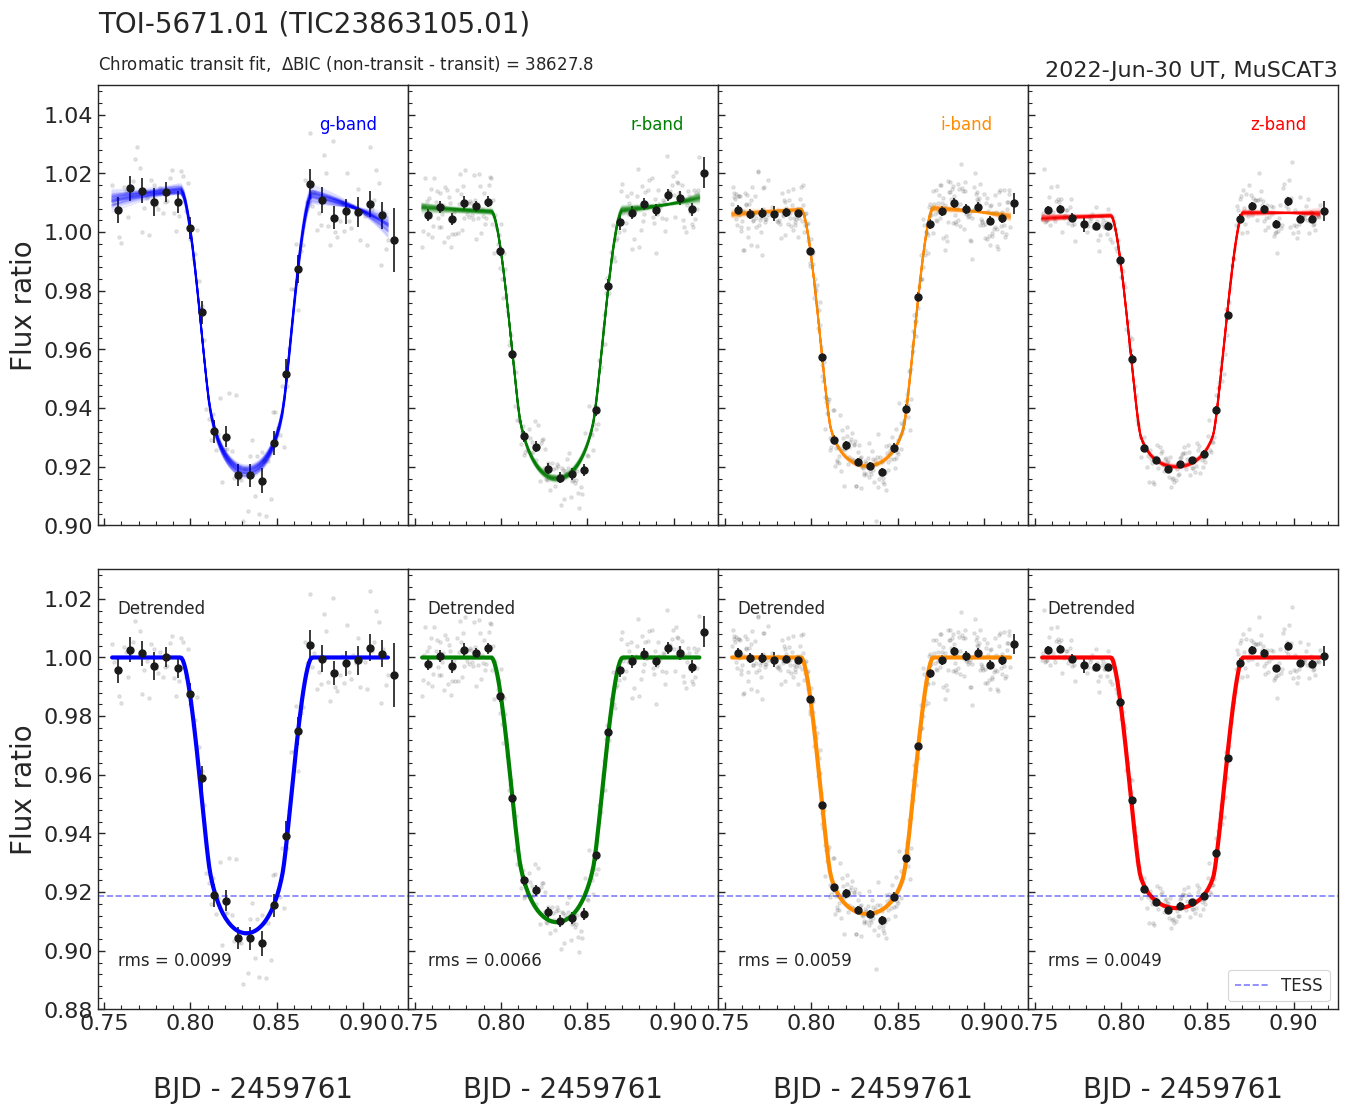

In [17]:
fig = lpf.plot_final_fit(ylims_top=(0.9,1.05), 
                         ylims_bottom=(0.88,1.03), 
                         fsize=20)

In [18]:
from aesthetic.plot import savefig

outfile = f"{lpf.name}.{lpf.alias}L-jd20{lpf.date}_{lpf.inst}_{''.join(lpf.bands)}_lc_{lpf.model}.pdf"
savefig(fig, outfile, dpi=300, writepdf=False)

2024-01-23T12:08:24.668159: made TOI-5671.01L-jd20220630_MuSCAT3_griz_lc_chromatic.pdf


In [22]:
fp = f"{lpf.name}.{lpf.alias}L-jd20{lpf.date}_{lpf.inst}_{''.join(lpf.bands)}_{lpf.model}_samples.csv.gz"
df = lpf.get_mcmc_samples()
df.to_csv(fp)

Text(0.5, 0, 'Planet radius ($R_{\\rm{Jup}}$)')

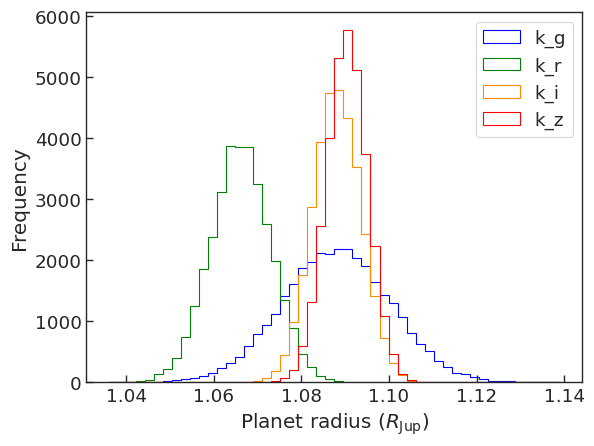

In [19]:
from tfop_analysis import colors
import astropy.units as u

rstar = lpf.star_params['rstar'][0]

if lpf.model=='chromatic':
    cols = [f'k_{b}' for b in lpf.bands]
    d = df[cols].apply(lambda x: x*rstar*u.Rsun.to(u.Rjup))
else:
    d = df['k'].apply(lambda x: x*rstar*u.Rsun.to(u.Rjup))
ax = d.plot.hist(grid=False, bins=50, histtype='step', color=colors.values())
ax.set_xlabel(r"Planet radius ($R_{\rm{Jup}}$)")

In [8]:
import os
import sys
from pathlib import Path
from dataclasses import dataclass, field
from typing import List, Dict, Tuple
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
from scipy.optimize import minimize

import emcee
import corner
from tqdm.autonotebook import tqdm
from pytransit import QuadraticModel
from ldtk import LDPSetCreator, BoxcarFilter
from aesthetic.plot import set_style, savefig
set_style("science")
sys.path.insert(0, "/ut3/muscat/src/AFPy")
import LC_funcs as lc

os.environ['OMP_NUM_THREADS']='1'
os.nice(19)

filter_widths = {'g': (430, 540),
                 'r': (560, 700),
                 'i': (700, 820),
                 'z': (830, 910),
                }
colors = {'g': 'blue',
          'r': 'green',
          'i': 'darkorange',
          'z': 'red',
         }
ticid = star.ticid

@dataclass
class LPF:
    name: str
    star_params: Dict[str, Tuple[float, float]] = field(repr=False)
    planet_params: Dict[str, Tuple[float, float]] = field(repr=False)
    alias: str = '01'
    bands: List[str] = field(default_factory=['g', 'r', 'i', 'z'])
    model : str = 'chromatic'
    phot_dir: str = '/ut3/jerome/github/research/project/toi5671/tfop'
    time_offset: float = 2_450_000
    
    def __post_init__(self):
        # super().__post_init__()
        self.teff = star_params['teff']
        self.logg = star_params['logg']
        self.feh = star_params['feh']
        self.data = self._read_phot_data()
        self._init_data()
        self._init_ldc()        
        
    def _read_phot_data(self):
        data = {}
        phot_files = list(Path(self.phot_dir).glob('*_measurements.csv'))
        for fp in phot_files:
            band = fp.name.split('_')[2]
            if band in self.bands:
                data[band] = pd.read_csv(fp)
        self.nband = len(data)
        return data  

    def _init_data(self):
        self.times = {}
        self.fluxes = {}
        self.flux_errs = {}
        self.airmasses = {}
        self.transit_models = {}
        self.lin_model_offsets = {b: 0 for b in self.bands}
        
        for b in self.bands:
            df = self.data[b]
            self.times[b] = df['BJD_TDB'].values-self.time_offset
            self.fluxes[b] = df['Flux'].values
            self.flux_errs[b] =  df['Err'].values
            self.airmasses[b] = df['Airmass']
            self.transit_models[b] = QuadraticModel()
            self.transit_models[b].set_data(self.times[b])
        self.ndata = sum([len(self.times[b]) for b in self.bands])

    def _init_ldc(self):
        self.ldc = []
        self.ldtk_filters = [BoxcarFilter(b, *filter_widths[b]) for b in self.bands]
        
        sc = LDPSetCreator(teff=self.teff, logg=self.logg, z=self.feh, filters=self.ldtk_filters)    
        # Create the limb darkening profiles
        ps = sc.create_profiles()                
        # Estimate quadratic law coefficients
        cq,eq = ps.coeffs_qd(do_mc=True)
        qc,qe = ps.coeffs_qd()
        for i in range(len(ps._filters)):
            # print(f"{ps._filters[i]}: {qc[i][0]:.2f}, {qc[i][1]:.2f}")
            self.ldc.append((qc[i][0], qc[i][1]))

    def get_chi2_linear(self, p0):
        b = self.bands[0]
        int_t0 = int(self.times[b][0])
        chi2 = 0.
        for i,b in enumerate(self.bands):
            flux_time = p0[i]*(self.times[b]-int_t0)
            c = np.polyfit(self.airmasses[b], self.fluxes[b]-flux_time, 1)
            chi2 = chi2 + np.sum( (self.fluxes[b] - np.polyval(c, self.airmasses[b]) + flux_time)**2 / self.flux_errs[b]**2 )
        return chi2

    def optimize_chi2_linear_baseline(self, p0=None, repeat=1):
        p0 = list(self.lin_model_offsets.values()) if p0 is None else p0
        for i in range(repeat):
            p = p0 if i==0 else res_lin.x
            res_lin = minimize(self.get_chi2_linear, p, method='Nelder-Mead')
            print(res_lin.fun, res_lin.success, res_lin.x)
        
        npar_lin = len(res_lin.x)
        # print('npar(linear) = ', npar_lin)
        self.bic_lin = res_lin.fun + npar_lin * np.log(self.ndata)
        # print('BIC(linear) = ', self.bic_lin)
        self.lin_model_offsets = {b: res_lin.x[i] for i,b in enumerate(self.bands)}

    def get_params_init(self, return_dict=False):
        tc0 = self.planet_params['t0']
        print(f"Input t0: {tc0}")
        tc, tc_err = tc0[0]-self.time_offset, tc0[1]
        self.period = self.planet_params['period']

        
        b = self.bands[0]
        int_tc = int(self.times[b][0])
        if abs(tc-int_tc)>1:            
            norbits = int((np.median(self.times[b]) - tc + 0.3)/self.period[0])
            tc = tc + self.period[0] * norbits
            tc_err = np.sqrt(tc_err**2 + (self.period[1]*norbits)**2)
            print(f"Shifted t0: ({tc+self.time_offset}, {tc_err})")
            print(f"Shifted by {norbits} periods.")
        self.tc = (tc, tc_err)

        params = {
            'tc': self.tc,
            'period': self.period,
            # 'imp': self.planet_params['imp'], 
            'b': (0,0.5),
            'a_Rs': self.planet_params['a_Rs'],
        }
        self.k_idx = len(params)
        if self.model=='chromatic':
            params.update({'k_'+b: self.planet_params['rprs'] for b in self.bands})
        elif self.model=='achromatic':
            params.update({'k': self.planet_params['rprs']})
        self.d_idx = len(params)
        params.update({'d_'+b: (self.lin_model_offsets[b],0) for b in self.bands})
        self.model_param_names = list(params.keys())
        self.ndim = len(params)
        return params if return_dict else [v[0] for k, v in params.items()] 
        
    def get_chi2_chromatic_transit(self, p):
        tc, per, imp, a_Rs = p[:self.k_idx]
        if self.model=='chromatic':
            k = [p[self.k_idx+i] for i in range(self.nband)]
            # k = p[self.k_idx:self.d_idx]
        elif self.model=='achromatic':
            k = np.zeros(self.nband)+p[self.k_idx]
        d = p[self.d_idx:self.d_idx+self.nband]
        inc = np.arccos(imp/a_Rs)
        
        #uniform priors
        if (np.array(k)<0.01).any():
            return np.inf
        if (np.array(k)>0.5).any():
            return np.inf
        if imp < 0 or imp > 1.0:
            return np.inf
        if a_Rs <= 0:
            return np.inf
        if imp/a_Rs >= 1:
            return np.inf       

        b = self.bands[0]
        if tc < self.times[b][0] or tc > self.times[b][-1]:
            return np.inf
        if tc > 0. and abs(tc - self.tc[0]) > self.period[0]/2.:
            return  np.inf
                
        chi2 = 0.
        for i,b in enumerate(self.bands):
            t = self.times[b]
            f = self.fluxes[b]
            e = self.flux_errs[b]
            z = self.airmasses[b]
            
            flux_tr = self.transit_models[b].evaluate_ps(k[i], self.ldc[i], tc, per, a_Rs, inc, e=0, w=0)
            flux_tr_time = d[i]*(t-tc) * flux_tr
            c = np.polyfit(z, (f-flux_tr_time)/flux_tr, 1)
            model = (np.polyval(c, z) + d[i]*(t-tc)) * flux_tr
            chi2 = chi2 + np.sum( (f - model)**2 / e**2 )
        
        # add normal priors
        if self.tc[0] > 0. and  self.tc[1] > 0:
            chi2 = chi2 + ((tc - self.tc[0])/self.tc[1])**2
        
        if self.planet_params['a_Rs'][0] > 0.:
            chi2 = chi2 + ((a_Rs - self.planet_params['a_Rs'][0])/self.planet_params['a_Rs'][1])**2
        
        # if self.planet_params['b'][0] > 0.:
        #     chi2 = chi2 + ((imp - self.planet_params['b'][0])/self.planet_params['b'][1])**2
            
        self.tdur = self.planet_params['tdur']
        if self.tdur[0] > 0.:
            cosi = imp / a_Rs
            sini = np.sqrt(1. - cosi**2)
            k_mean = np.mean(k)
            tdur = per/np.pi * np.arcsin(1./a_Rs*np.sqrt((1.+k_mean)**2 - imp**2)/sini);
            chi2 = chi2 + (tdur - self.tdur[0])**2/self.tdur[1]**2            
        return chi2
    
    def neg_loglikelihood(self, p):
        return -self.get_chi2_chromatic_transit(p)
    
    def optimize_chromatic_transit(self, p0):
        result = minimize(self.get_chi2_chromatic_transit, p0, method='Nelder-Mead')
        # print(result.fun, result.success)
        ## minimize again if needed
        result = minimize(self.get_chi2_chromatic_transit, result.x,  method='Nelder-Mead')
        # print(result.fun, result.x)
        print("---------------------")
        print("Optimized parameters:")
        for n,i in zip(self.model_param_names, result.x):
            print(f"{n}: {i:.2f}")
        self.optimum_params = result.x

    def plot_optimum_lightcurves(self, binsize=600/86400):
        
        p = self.optimum_params
        tc, per, imp, a_Rs = p[:self.k_idx]
        if self.model=='chromatic':
            k = [p[self.k_idx+i] for i in range(self.nband)]
            # k = p[self.k_idx:self.d_idx]
        elif self.model=='achromatic':
            k = np.zeros(self.nband)+p[self.k_idx]
        d = p[self.d_idx:self.d_idx+self.nband]
        inc = np.arccos(imp/a_Rs)
        
        for i,b in enumerate(self.bands):
            fig, ax = plt.subplots(1, 2, sharey=True, figsize=(6,4))
            t = self.times[b]
            f = self.fluxes[b]
            e = self.flux_errs[b]
            z =  self.airmasses[b]
            
            flux_tr = self.transit_models[b].evaluate_ps(k[i], self.ldc[i], tc, per, a_Rs, inc, e=0, w=0)
            xmodel = np.linspace(np.min(t), np.max(t), 200)
            
            tmodel = QuadraticModel()
            tmodel.set_data(xmodel)
            ymodel = tmodel.evaluate_ps(k[i], self.ldc[i], tc, per, a_Rs, inc, e=0, w=0)
            
            flux_tr_time = d[i]*(t-tc) * flux_tr
            c = np.polyfit(z, (f-flux_tr_time)/flux_tr, 1)
            t0 = np.min(t)
            
            tbin, ybin, yebin=\
                lc.binning_equal_interval(t, f, e, binsize, t0)
        
            
            ax[0].plot(t, f,'.k', alpha=0.3)
            ax[0].plot(tbin, ybin, 'o', color=colors[b])
            ax[0].plot(t, flux_tr * (np.polyval(c, z) + d[i]*(t-tc)))
            
            tbin, ybin, yebin=\
                lc.binning_equal_interval(t, f/(np.polyval(c, z) + d[i]*(t-tc)), e, binsize, t0)
            ax[1].plot(t, f/(np.polyval(c, z) + d[i]*(t-tc)),'.k', alpha=0.3)
            ax[1].plot(tbin, ybin,'o', color=colors[b])
            ax[1].plot(xmodel, ymodel)
            fig.suptitle(f"{b}-band")

    def sample_mcmc(self, nsteps=1_000):
        self.nwalkers = 3*self.ndim
        pos = [self.optimum_params + 1e-5*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        
        with Pool(self.ndim) as pool:
            self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, self.neg_loglikelihood, pool=pool)
            state = self.sampler.run_mcmc(pos, nsteps//2, progress=True)
            
            self.sampler.reset()
            self.sampler.run_mcmc(state, nsteps, progress=True)
            
        log_prob = self.sampler.get_log_prob()
        argmax = np.argmax(log_prob)
        self.best_fit_params = self.sampler.flatchain[argmax]
        #compute bic
        j = int(argmax/self.nwalkers)
        i = argmax-self.nwalkers*j
        self.chi2_best = -log_prob[j,i]
        # print(chi2_best)
        npar_tr = len(self.best_fit_params)#+4
        # print('ndata = ', self.ndata)
        # print('npar(transit+linear) = ', npar_tr)
        self.bic = self.chi2_best + npar_tr * np.log(self.ndata)
        # print('BIC(transit+linear) = ', bic_tr)
        self.bic_delta = self.bic_lin - self.bic
        # print('delta_BIC = ', delta_bic)

    def get_mcmc_samples(self, discard=1, thin=1):
        # fc = self.sampler.flatchain
        fc = self.sampler.get_chain(flat=True, discard=discard, thin=thin)
        df = pd.DataFrame(fc, columns=self.model_param_names)
        df['tc'] = df['tc']+self.time_offset
        return df

    def plot_chain(self, start=0, end=None):
        end = self.ndim if end is None else end
        fig, axes = plt.subplots(end-start, figsize=(10, 10), sharex=True)
        samples = self.sampler.get_chain()
        for i in np.arange(start, end):
            ax = axes[i]
            ax.plot(samples[:, :, start+i], "k", alpha=0.3)
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(self.model_param_names[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
        
        axes[-1].set_xlabel("step number");
        return fig

    def plot_corner(self, discard=1, thin=1, start=0, end=4):
        fc = self.sampler.get_chain(flat=True, discard=discard, thin=thin)
        fc[:,2] = np.sqrt(fc[:,2]*fc[:,2])
        fig = corner.corner(fc[:,start:end], 
                            labels=self.model_param_names[start:end],
                            show_titles=True
                           )
        return fig

    def plot_final_fit(self, 
                       discard=1, 
                       thin=1,
                       nsamples=100, 
                       ylims_top: tuple = (0.9, 1.02), 
                       ylims_bottom: tuple = (0.9, 1.02), 
                       msize=5,
                       fsize=20,
                       binsize=600/86400):
                       
        ymin1, ymax1 = ylims_top
        ymin2, ymax2 = ylims_bottom
        
        fig, ax = plt.subplots(2, self.nband, figsize=(16,12), sharey='row', sharex='col')
        plt.subplots_adjust(hspace=0.1, wspace=0)
        plt.rcParams['font.size'] = 16
        
        x1 = [0.3, 0.5, 0.7]
        x2 = [0.5, 0.7, 0.9]
        y1 = [0.3, 0.6]
        y2 = [0.6, 0.9]
        
        tc_best, per_best, imp_best, a_Rs_best = self.best_fit_params[:self.k_idx]

        if self.model=='chromatic':
            k_best = [self.best_fit_params[self.k_idx+i] for i in range(self.nband)]
            # k = self.best_fit_params[self.k_idx:self.d_idx]
        elif self.model=='achromatic':
            k_best = np.zeros(self.nband)+self.best_fit_params[self.k_idx]
        d_best = self.best_fit_params[self.d_idx:self.d_idx+self.nband]
        inc_best = np.arccos(imp_best/a_Rs_best)
        
        fc = self.sampler.get_chain(flat=True, discard=discard, thin=thin)
        #TODO: search index by name
        # fc[:,2] = np.sqrt(fc[:,2]**2)
        
        for i,b in enumerate(self.bands):
            t = self.times[b]
            f = self.fluxes[b]
            e = self.flux_errs[b]
            z = self.airmasses[b]
            tbin, ybin, yebin= lc.binning_equal_interval(t, f, e, binsize, self.tc[0])
            ax[0,i].plot(t, f, '.k', alpha=0.1)
            ax[0,i].errorbar(tbin, ybin, yerr=yebin, fmt='ok', markersize=msize)            
            
            rand = np.random.randint(len(fc), size=nsamples)
            for j in range(len(rand)):
                idx = rand[j]
                tc, per, imp, a_Rs = fc[idx,:self.k_idx]
                if self.model=='chromatic':
                    k = fc[idx,self.k_idx:self.d_idx]
                elif self.model=='achromatic':
                    k = np.zeros(self.nband)+fc[idx,self.k_idx]
                d = fc[idx,self.d_idx:self.d_idx+self.nband]
                inc = np.arccos(imp/a_Rs)
                flux_tr = self.transit_models[b].evaluate_ps(k[i], self.ldc[i], tc, per, a_Rs, inc, e=0, w=0)
                flux_tr_time = d[i]*(t-tc) * flux_tr
                c = np.polyfit(z, (f-flux_tr_time)/flux_tr, 1)
                ax[0,i].plot(t,  flux_tr * (np.polyval(c, z)+d[i]*(t-tc)), alpha=0.05, color=colors[b])

            #best-fit
            flux_tr = self.transit_models[b].evaluate_ps(k_best[i], self.ldc[i], tc_best, per_best, a_Rs_best, inc_best, e=0, w=0)
            flux_tr_time = d_best[i]*(t-tc_best) * flux_tr
            c = np.polyfit(z, (f-flux_tr_time)/flux_tr, 1)
            # print(i, rms_text)
            tbin, ybin, yebin=\
                lc.binning_equal_interval(t, f/(np.polyval(c, z)+d_best[i]*(t-tc_best)), e, binsize, self.tc[0])
            ax[1,i].plot(t, f/(np.polyval(c, z)+d_best[i]*(t-tc_best)), '.k', alpha=0.1)
            ax[1,i].errorbar(tbin, ybin, yerr=yebin, fmt='ok', markersize=msize)

            xmodel = np.linspace(np.min(t), np.max(t), 200)
            tmodel = QuadraticModel()
            tmodel.set_data(xmodel)
            ymodel = tmodel.evaluate_ps(k_best[i], self.ldc[i], tc_best, per_best, a_Rs_best, inc_best, e=0, w=0)
            ax[1,i].plot(xmodel, ymodel, color=colors[b], linewidth=3)
        
            ax[0,i].yaxis.set_minor_locator(AutoMinorLocator(5))
            ax[1,i].yaxis.set_minor_locator(AutoMinorLocator(5))
            ax[0,i].xaxis.set_minor_locator(AutoMinorLocator(5))
            ax[1,i].xaxis.set_minor_locator(AutoMinorLocator(5))
            ax[0,i].set_ylim(ymin1, ymax1)
            ax[1,i].set_ylim(ymin2, ymax2)
            
            tx = np.min(t) + (np.max(t) - np.min(t))*0.75
            ty = ymin1 + (ymax1 - ymin1)*0.9
            ax[0,i].text(tx, ty, f"{b}-band", color=colors[b], fontsize=fsize*0.6)
            
            tx = np.min(t) + (np.max(t) - np.min(t))*0.02
            ty = ymin2 + (ymax2 - ymin2)*0.9
            ax[1,i].text(tx, ty, 'Detrended', fontsize=fsize*0.6)

            rms = np.std( f - flux_tr * (np.polyval(c, z)+d_best[i]*(t-tc_best)) )
            rms_text = f'rms = {rms:.4f}'
            ty = ymin2 + (ymax2 - ymin2)*0.1
            ax[1,i].text(tx, ty, rms_text, fontsize=fsize*0.6)
            depth = self.planet_params['rprs'][0]**2
            ax[1,i].axhline(1-depth, color='blue', linestyle='dashed', label='TESS', alpha=0.5)
                        
            # ing,egr=tref-T14_TFOP/2,tref+T14_TFOP/2
            # ax[1,i].axvspan(ing-T14e_TFOP/2, ing+T14e_TFOP/2, alpha=1, ymin=0.9, ymax=1.)
            # ax[1,i].axvspan(ing-3*T14e_TFOP/2, ing+3*T14e_TFOP/2, alpha=0.5, ymin=0.9, ymax=1.)
            # ax[1,i].axvspan(egr-T14e_TFOP/2, egr+T14e_TFOP/2, alpha=1, ymin=0.9, ymax=1.)
            # ax[1,i].axvspan(egr-3*T14e_TFOP/2, egr+3*T14e_TFOP/2, alpha=0.5, ymin=0.9, ymax=1.)
            
            if(i==0):
                ax[0,i].set_ylabel('Flux ratio', fontsize=fsize)
                ax[1,i].set_ylabel('Flux ratio', fontsize=fsize)
                ax[0,i].tick_params(labelsize=16)
                ax[1,i].tick_params(labelsize=16)
                target_name = f'{self.name}.{self.alias} (TIC{ticid}.{self.alias})'
                ax[0,i].text(0., 1.14, target_name, horizontalalignment='left',\
                         verticalalignment='center', transform=ax[0,i].transAxes, fontsize=fsize)
                ax[0,i].text(0., 1.05, f'{self.model.title()} transit fit,  $\Delta$BIC (non-transit - transit) = {self.bic_delta:.1f}',\
                         horizontalalignment='left', verticalalignment='center', transform=ax[0,i].transAxes, fontsize=fsize*0.6)
            if(i==3):
                ax[0,i].set_title(f'{date4plot}, {inst}', loc='right', fontsize=fsize*0.8)
            if(i>0):
                ax[0,i].tick_params(labelleft=False, labelright=False, labeltop=False, labelsize=16)
                ax[1,i].tick_params(labelleft=False, labelright=False, labeltop=False, labelsize=16)
        
            ax[1,i].set_xlabel(f'BJD - {self.time_offset:.0f}', labelpad=30, fontsize=fsize)        
        ax[1,i].legend(loc='lower right', fontsize=12)
        return fig    

In [31]:
val = lc.percentile(samples[:,0])
print('Tc = {0:.5f} +{1:.5f} -{2:.5f}'.format(val[0],val[2]-val[0],val[0]-val[1]))
Tc_med, Tc_1h, Tc_1m = val[0], val[2]-val[0],val[0]-val[1]
for i,band in enumerate(bands):
    val = lc.percentile(samples[:,4+i])
    print(f'Rp/Rs({band}) = {val[0]:.4f} +{val[2]-val[0]:.4f} -{val[0]-val[1]:.4f}')

Tc = 9761.83240 +0.00006 -0.00006
Rp/Rs(g) = 0.2710 +0.0059 -0.0058
Rp/Rs(r) = 0.2782 +0.0034 -0.0037
Rp/Rs(i) = 0.2792 +0.0031 -0.0033
Rp/Rs(z) = 0.2785 +0.0028 -0.0030


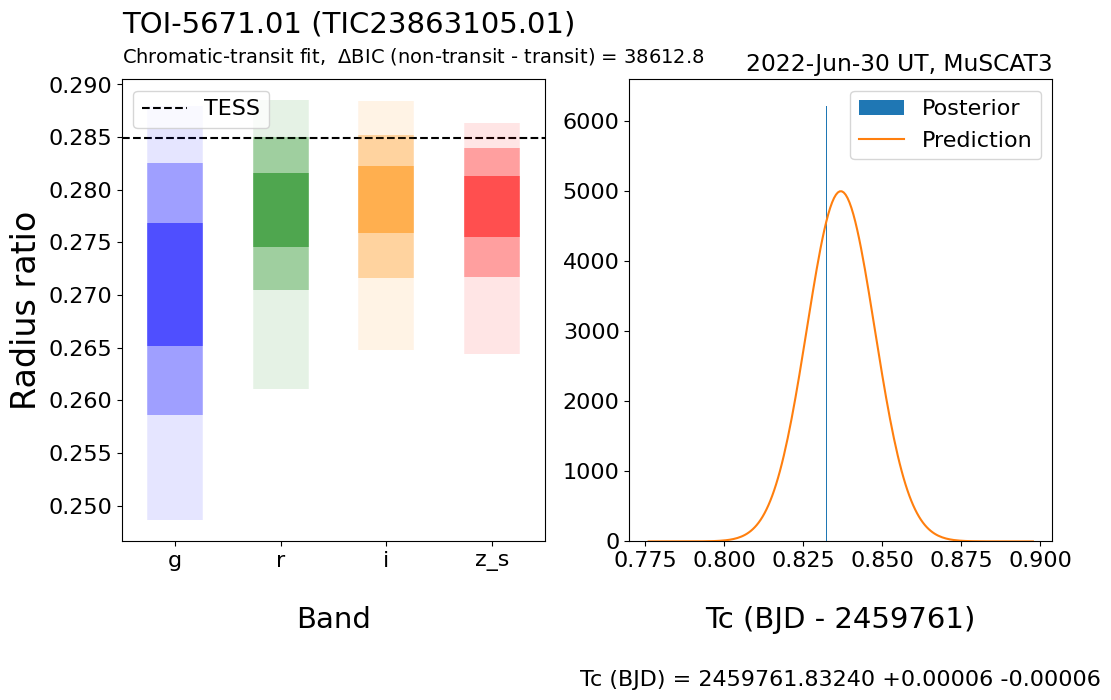

In [41]:
## make plots for Rp/Rs and Tc

Tc_med = lc.percentile(samples[:,0])[0]
per_med = lc.percentile(samples[:,1])[0]
b_med = lc.percentile(samples[:,2])[0]
a_Rs_med = lc.percentile(samples[:,3])[0]
inc_med = math.acos(b_med/a_Rs_med) 

bands = np.array((0,1,2,3))
k_val = []
q1_med, q2_med = [], []
d_med = []
for i,band in enumerate(bands):
    k_val.append(lc.percentile(samples[:,4+i]))
    q1_med.append(lc.percentile(samples[:,8+i])[0])
    q2_med.append(lc.percentile(samples[:,12+i])[0])
    d_med.append(lc.percentile(samples[:,16+i])[0])

qs_med = [(i,j) for i,j in zip(q1_med,q2_med)]

k_med = np.zeros(len(bands))
k_err1 = np.zeros((len(bands), 2))
k_err2 = np.zeros((len(bands), 2))
k_err3 = np.zeros((len(bands), 2))
colors = ['blue','green','darkorange','red']

fig = plt.figure(figsize=(12,6))
fsize=16
plt.rcParams['font.size'] = fsize

ax0, ax1 = fig.subplots(1, 2)

ype1 = np.zeros((2,1))
ype2 = np.zeros((2,1))
ype3 = np.zeros((2,1))
for i in range(len(bands)):
    k_med[i] = k_val[i][0]
    k_err1[i] = np.array((k_val[i][0]-k_val[i][1], k_val[i][2]-k_val[i][0]))
    k_err2[i] = np.array((k_val[i][0]-k_val[i][3], k_val[i][4]-k_val[i][0]))
    k_err3[i] = np.array((k_val[i][0]-k_val[i][5], k_val[i][6]-k_val[i][0]))
    
    xp = (i)
    yp = (k_med[i])
    ype1[0,0], ype1[1,0] = k_val[i][0]-k_val[i][1], k_val[i][2]-k_val[i][0]
    ype2[0,0], ype2[1,0] = k_val[i][0]-k_val[i][3], k_val[i][4]-k_val[i][0]
    ype3[0,0], ype3[1,0] = k_val[i][0]-k_val[i][5], k_val[i][6]-k_val[i][0]
    ax0.errorbar(xp, yp, yerr=ype1, elinewidth=40, fmt='none', alpha=0.5, zorder=1, color=colors[i])
    ax0.errorbar(xp, yp, yerr=ype2, elinewidth=40, fmt='none', alpha=0.3, zorder=2, color=colors[i])
    ax0.errorbar(xp, yp, yerr=ype3, elinewidth=40, fmt='none', alpha=0.1, zorder=3, color=colors[i])

ax0.axhline(k_TFOP, linestyle='dashed', color='black', label='TESS')

ax0.set_xlim(-0.5,3.5)
ax0.set_xticks([0,1,2,3])
ax0.set_xticklabels(['g','r','i','z_s'])
ax0.set_ylabel('Radius ratio', fontsize=fsize*1.5)
fsize=14

#ax0.set_title(toi+' ('+tic+')', loc='left', fontsize=fsize*1.5)
target_name = 'TOI-{0}.{1} (TIC{2}.{1})'.format(toi,plnum,tic)
ax0.text(0., 1.12, target_name, horizontalalignment='left',\
         verticalalignment='center', transform=ax0.transAxes, fontsize=fsize*1.5)
ax0.text(0., 1.05, 'Chromatic-transit fit,  $\Delta$BIC (non-transit - transit) = {0:.1f}'.format(delta_bic),\
         horizontalalignment='left', verticalalignment='center', transform=ax0.transAxes, fontsize=fsize)

ax1.set_title(date4plot+', MuSCAT3', loc='right', fontsize=fsize*1.2)
ax0.set_xlabel('Band', labelpad=25, fontsize=fsize*1.5)
ax0.legend(loc='upper left')


intt0 = int(np.min(samples[:,0]))
#ax1.hist(samples[:,0]-intt0, bins=30, zorder=4, label='Posterior')
ax1.hist(samples[:,0]-intt0, density=True, bins=50, zorder=5, label='Posterior')

Tc_TFOP = T0_TFOP + P_TFOP * epoch - 2450000
xmodel = np.linspace(Tc_TFOP-4*Tce_TFOP, Tc_TFOP+4*Tce_TFOP, 200)
ymodel = 5000 * np.exp( -(xmodel-Tc_TFOP)**2 / Tce_TFOP**2)
ax1.plot(xmodel-intt0, ymodel, label='Prediction', zorder=5)

Tc_text = 'Tc (BJD) = {0:.5f} +{1:.5f} -{2:.5f}'.format(2450000+Tc_med, Tc_1h, Tc_1m)
ax1.text(0.5, -0.3, Tc_text, horizontalalignment='center',\
         verticalalignment='center', transform=ax1.transAxes)

ax1.set_xlabel('Tc (BJD - 245{0})'.format(intt0), labelpad=25, fontsize=fsize*1.5)
ax1.legend()
#ax1.set_xlim(-0.01,0.1)

outfile = outfile = 'TOI{0}.{1}L-{2}20{3}_{4}_griz_lcfit_chromatic_Tdur_prior_flare.pdf'.format(toi, plnum, initial, date, INST[inst])
plt.savefig(outfile, bbox_inches='tight',pad_inches=0.1)
plt.show()

0 rms = 0.0261
1 rms = 0.0225
2 rms = 0.0216
3 rms = 0.0210


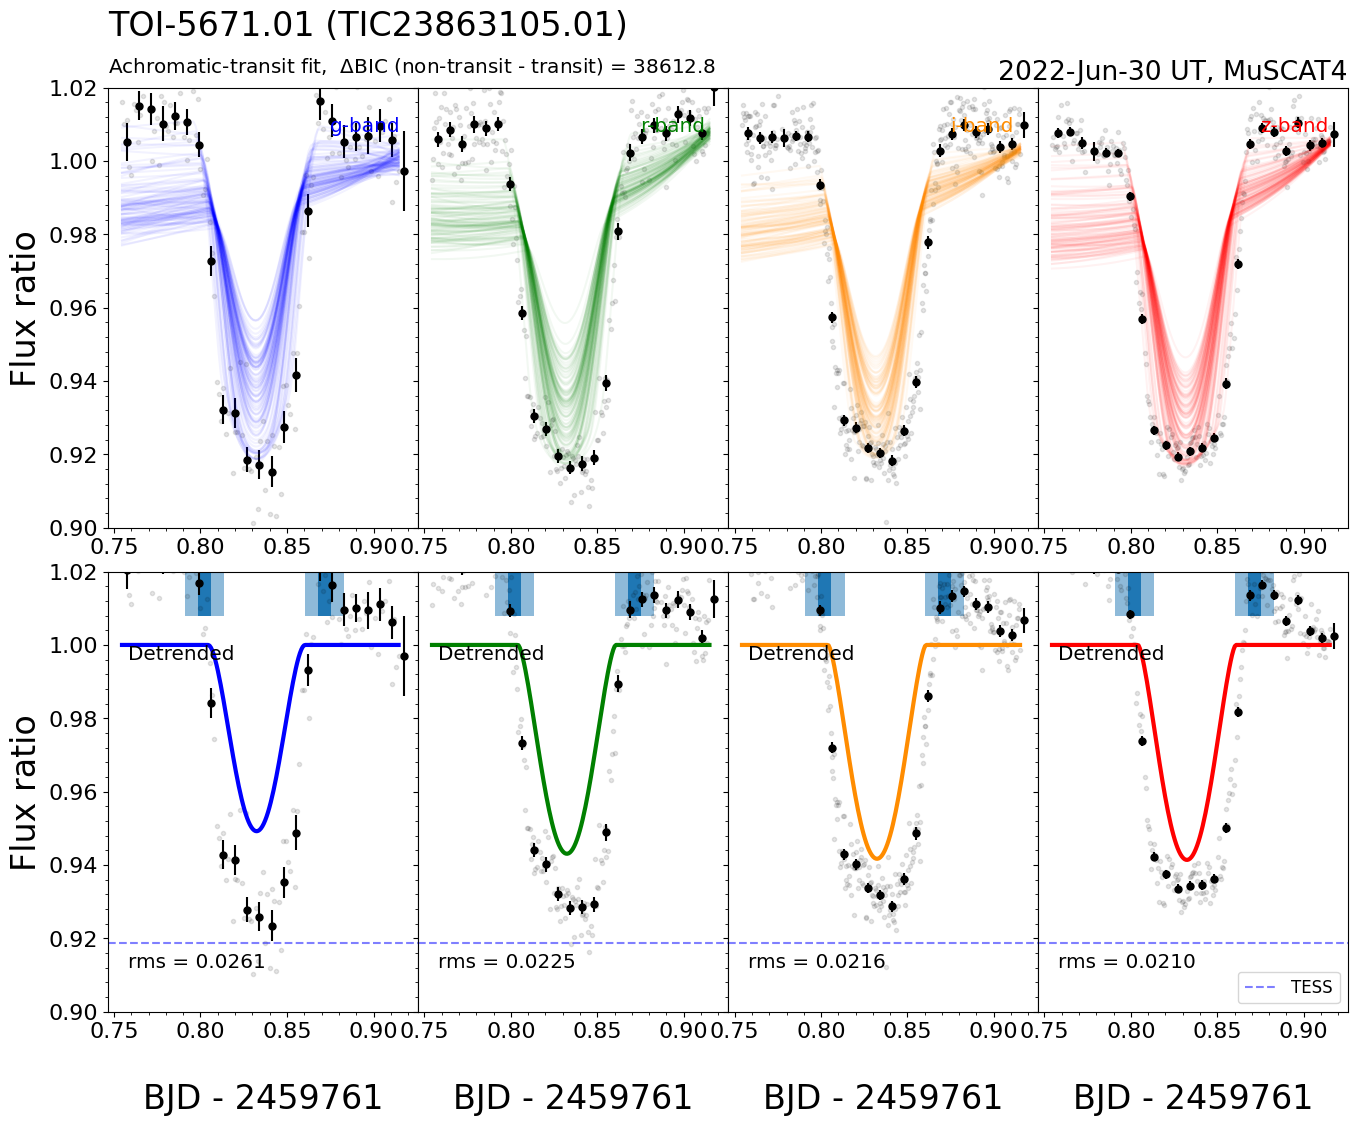

In [43]:
import math
from matplotlib.ticker import AutoMinorLocator

e0 = kwargs['e']
omega0 = kwargs['omega']

ymin1 = 0.9
ymax1 = 1.02
ymin2 = 0.9
ymax2 = 1.02

bands = ['g-band', 'r-band', 'i-band', 'z-band']
colors = ['blue', 'green', 'darkorange', 'red']

k = np.zeros(4)
q1 = np.zeros(4)
q2 = np.zeros(4)

nmodel = 100
msize = 5
fsize=24

fig, ax = plt.subplots(2,4,figsize=(16,12))
plt.subplots_adjust(hspace=0.1, wspace=0)
plt.rcParams['font.size'] = 16

x1 = [0.3, 0.5, 0.7]
x2 = [0.5, 0.7, 0.9]
y1 = [0.3, 0.6]
y2 = [0.6, 0.9]

t0 = np.min(np.concatenate((x[0],x[1],x[2],x[3])))
intt0=int(t0)
            
for i in range(4):
    
    tbin, ybin, yebin=\
        lc.binning_equal_interval(x[i]-intt0, y[i], ye[i], binsize, t0)

    ax[0,i].plot(x[i]-intt0,y[i],'.k',alpha=0.1)
    ax[0,i].errorbar(tbin, ybin, yerr=yebin, fmt='ok', markersize=msize)
 
    xmodel = np.linspace(np.min(x[i]), np.max(x[i]), 200)
    ttr_model = QuadraticModel()
    ttr_model.set_data(xmodel)

    rand = np.random.randint(len(samples), size=nmodel)
    
    for j in range(len(rand)):
        idx = rand[j]
        Tc, per, b, a_Rs = samples[idx,:4]
        k[0], k[1], k[2], k[3] = samples[idx,4:8]
        q1[0], q1[1], q1[2], q1[3] = samples[idx,8:12]
        q2[0], q2[1], q2[2], q2[3] = samples[idx,12:16]
        qs = [(i,j) for i,j in zip(q1,q2)]
        d[0], d[1], d[2], d[3] = samples[idx,16:20]
        inc = math.acos(b/a_Rs)
        flux_tr = ttr[i].evaluate_ps(k[i], qs[i], Tc, per, a_Rs, inc, e0, omega0)
        flux_tr_time = d[i]*(x[i]-Tc) * flux_tr
        c = np.polyfit(amass[i], (y[i]-flux_tr_time)/flux_tr, 1)
        ax[0,i].plot(x[i]-intt0,  flux_tr * (np.polyval(c, amass[i])+d[i]*(x[i]-Tc)), alpha=0.05, color=colors[i])
    
    flux_tr = ttr[i].evaluate_ps(k_med[i], qs_med[i], Tc_med, per_med, a_Rs_med, inc_med, e0, omega0)
    flux_tr_time = d_med[i]*(x[i]-Tc_med) * flux_tr
    c = np.polyfit(amass[i], (y[i]-flux_tr_time)/flux_tr, 1)
    ymodel = ttr_model.evaluate_ps(k_med[i], qs_med[i], Tc_med, per_med, a_Rs_med, inc_med, e0, omega0)
    
    rms = np.std( y[i] - flux_tr * (np.polyval(c, amass[i])+d_med[i]*(x[i]-Tc_med)) )
    rms_text = 'rms = {0:.4f}'.format(rms)
    print(i, rms_text)
    
    
    tbin, ybin, yebin=\
        lc.binning_equal_interval(x[i]-intt0, y[i]/(np.polyval(c, amass[i])+d_med[i]*(x[i]-Tc_med)), ye[i], binsize, t0)
    ax[1,i].plot(x[i]-intt0,y[i]/(np.polyval(c, amass[i])+d_med[i]*(x[i]-Tc_med)),'.k',alpha=0.1)
    ax[1,i].errorbar(tbin, ybin, yerr=yebin, fmt='ok', markersize=msize)
                    
    ax[1,i].plot(xmodel-intt0, ymodel, color=colors[i], linewidth=3)

    ax[0,i].yaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1,i].yaxis.set_minor_locator(AutoMinorLocator(5))
    ax[0,i].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1,i].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[0,i].set_ylim(ymin1, ymax1)
    ax[1,i].set_ylim(ymin2, ymax2)
    
    tx = np.min(x[i]) + (np.max(x[i]) - np.min(x[i]))*0.75
    ty = ymin1 + (ymax1 - ymin1)*0.9
    ax[0,i].text(tx - intt0, ty, bands[i], color=colors[i], fontsize=fsize*0.6)
    
    tx = np.min(x[i]) + (np.max(x[i]) - np.min(x[i]))*0.02
    ty = ymin2 + (ymax2 - ymin2)*0.8
    ax[1,i].text(tx-intt0, ty, 'Detrended', fontsize=fsize*0.6)
    
    ty = ymin2 + (ymax2 - ymin2)*0.1
    ax[1,i].text(tx - intt0, ty, rms_text, fontsize=fsize*0.6)
    # depth = k_TFOP**2
    depth = float(data_json['planet_parameters'][1]['dep_p'])/1e6
    ax[1,i].axhline(1-depth, color='blue', linestyle='dashed', label='TESS', alpha=0.5)
    
    tref = Tc_TFOP-intt0
    
    ing,egr=tref-T14_TFOP/2,tref+T14_TFOP/2
    ax[1,i].axvspan(ing-T14e_TFOP/2, ing+T14e_TFOP/2, alpha=1, ymin=0.9, ymax=1.)
    ax[1,i].axvspan(ing-3*T14e_TFOP/2, ing+3*T14e_TFOP/2, alpha=0.5, ymin=0.9, ymax=1.)
    ax[1,i].axvspan(egr-T14e_TFOP/2, egr+T14e_TFOP/2, alpha=1, ymin=0.9, ymax=1.)
    ax[1,i].axvspan(egr-3*T14e_TFOP/2, egr+3*T14e_TFOP/2, alpha=0.5, ymin=0.9, ymax=1.)
    
    if(i==0):
        ax[0,i].set_ylabel('Flux ratio', fontsize=fsize)
        ax[1,i].set_ylabel('Flux ratio', fontsize=fsize)
        ax[0,i].tick_params(labelsize=16)
        ax[1,i].tick_params(labelsize=16)
#        ax0.set_title(toi+' ('+tic+')', loc='left', fontsize=fsize)
        target_name = 'TOI-{0}.{1} (TIC{2}.{1})'.format(toi,plnum,tic)
        ax[0,i].text(0., 1.14, target_name, horizontalalignment='left',\
                 verticalalignment='center', transform=ax[0,i].transAxes, fontsize=fsize)
        ax[0,i].text(0., 1.05, 'Achromatic-transit fit,  $\Delta$BIC (non-transit - transit) = {0:.1f}'.format(delta_bic),\
                 horizontalalignment='left', verticalalignment='center', transform=ax[0,i].transAxes, fontsize=fsize*0.6)
        
    if(i==3):
        ax[0,i].set_title(date4plot+', MuSCAT4', loc='right', fontsize=fsize*0.8)
        
    if(i>0):
        ax[0,i].tick_params(labelleft=False, labelright=False, labeltop=False, labelsize=16)
        ax[1,i].tick_params(labelleft=False, labelright=False, labeltop=False, labelsize=16)

    ax[1,i].set_xlabel('BJD - 245{0}'.format(intt0), labelpad=30, fontsize=fsize)

ax[1,i].legend(loc='lower right', fontsize=12)

In [28]:
param_names = ['Tc', 'b', 'a_Rs', 'k_g', 'k_r', 'k_i', 'k_z', 'd0', 'd1', 'd2', 'd3']

In [35]:
import pandas as pd

df = pd.DataFrame(samples, columns=param_names)
fp = 'm4_chromatic_mcmc_samples.zip'
df.to_csv(fp, index=False)